In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras import layers, models

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [10]:
x_train = x_train / 255.0
x_test = x_test / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [27]:
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [30]:
model.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

In [31]:
# Training model

model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2576 - accuracy: 0.9269
Epoch 2/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.1135 - accuracy: 0.9662
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0782 - accuracy: 0.9769
Epoch 4/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0579 - accuracy: 0.9820
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0452 - accuracy: 0.9860


In [33]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_accuracy:.3f}')

313/313 - 1s - loss: 0.0810 - accuracy: 0.9750 - 836ms/epoch - 3ms/step
Test accuracy: 0.975


In [34]:
predictions = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


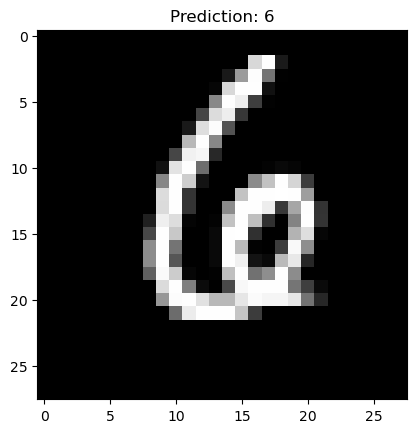

In [56]:
index = 123
prediction = np.argmax(predictions[index])
image = x_test[index]

plt.imshow(image, cmap='gray')
plt.title(f'Prediction: {prediction}')
plt.show()
